In [1]:
# https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/
#  We will be using an item-based collaborative filtering algorithm for our purpose.


#getting the data up and running
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("user_ratings.csv")
print(movies.head())
print(ratings.head())


final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')

print(final_dataset.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genr

In [2]:
final_dataset.fillna(0,inplace=True)
print(final_dataset.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]


In [3]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

print(no_user_voted, no_movies_voted)

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64 userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64


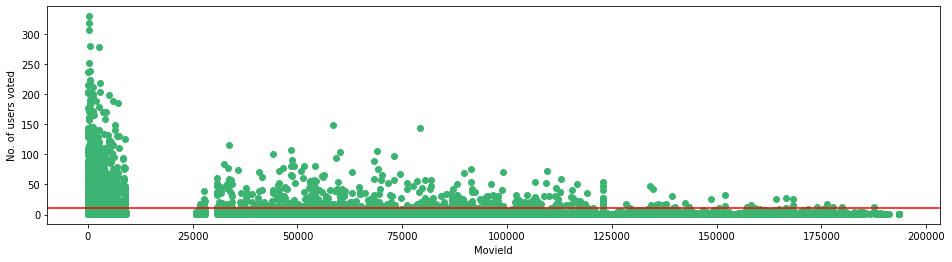

In [4]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [5]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

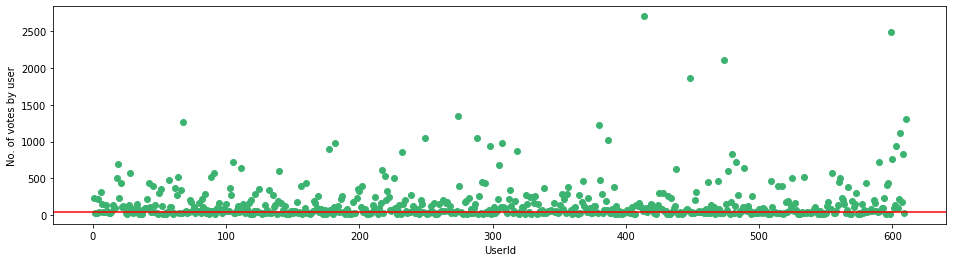

In [6]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [7]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
print(final_dataset)

userId   1    4    6    7    10   11   15   16   17   18   ...  600  601  602  \
movieId                                                    ...                  
1        4.0  0.0  0.0  4.5  0.0  0.0  2.5  0.0  4.5  3.5  ...  2.5  4.0  0.0   
2        0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  ...  4.0  0.0  4.0   
3        4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.5  0.0  0.0   
6        4.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  0.0  4.0  ...  0.0  0.0  3.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
174055   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
176371   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
177765   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.5  0.0   
179819   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
187593   0.0  0.0  0.0  0.0 

**REMOIVNG SPARSITY**

Our final_dataset has dimensions of 2121 * 378 where most of the values are sparse. We are using only a small dataset but for the original large dataset of movie lens which has more than 100000 features, our system may run out of computational resources when that is feed to the model. To reduce the sparsity we use the csr_matrix function from the scipy library.

 I’ll give an example of how it works :


In [8]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [9]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


As you can see there is no sparse value in the csr_sample and values are assigned as rows and column index. for the 0th row and 2nd column, the value is 3.

Applying the csr_matrix method to the dataset :

In [10]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

**Making the movie recommendation system model**

The working principle is very simple. We first check if the movie name input is in the database and if it is we use our recommendation system to find similar movies and sort them based on their similarity distance and output only the top 10 movies with their distances from the input movie.

In [11]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [12]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [22]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 20
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

**Finally, Let’s Recommend some movies!**

In [23]:
get_movie_recommendation('Heat')

,Title,Distance
1,Star Wars: Episode IV - A New Hope (1977),0.517193
2,Broken Arrow (1996),0.516743
3,Independence Day (a.k.a. ID4) (1996),0.515095
4,Reservoir Dogs (1992),0.513864
5,Batman (1989),0.505918
6,Saving Private Ryan (1998),0.505387
7,"Silence of the Lambs, The (1991)",0.504638
8,Speed (1994),0.503745
9,Fargo (1996),0.498782
10,Terminator 2: Judgment Day (1991),0.497676
